In [20]:
import random
import numpy as np

dictionary = [{'state':np.array([0,0,0,1]), 'action': np.array([2,3,4]), 'done':True}, 
              {'state':np.array([1,0,0,1]), 'action': np.array([2,5,4]), 'done':False},
              {'state':np.array([1,1,0,1]), 'action': np.array([0,5,4]), 'done':True}]

list_test = [[1,2,3,4],[2,3,4,5],[6,7,8,9]]
samples = random.sample(dictionary, 3)
samples = np.array(samples)

for i,sample in enumerate(samples):
    
    print(sample['done']*1, sample['done'])

0 False
1 True
1 True


In [34]:
rewards = np.loadtxt('Checkpoints/Rewards/avg.txt')

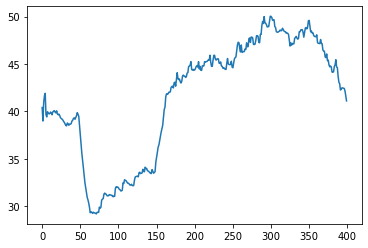

In [37]:
from matplotlib import pyplot as plt
plt.plot(rewards)

In [30]:
import pickle

pickle.dump(dictionary, open('mytest.p','wb'))

In [32]:
myDicts = pickle.load( open ("mytest.p", "rb") )

In [33]:
myDicts

[{'state': array([0, 0, 0, 1]), 'action': array([2, 3, 4]), 'done': True},
 {'state': array([1, 0, 0, 1]), 'action': array([2, 5, 4]), 'done': False},
 {'state': array([1, 1, 0, 1]), 'action': array([0, 5, 4]), 'done': True}]

In [25]:
outfile = 'dicttest.npz'
for row in dictionary:
    np.savez(outfile, **row)

npzfile  = np.load(outfile)
print('npzfile.files: {}'.format(npzfile.files))
print('npzfile["1"]: {}'.format(npzfile["state"]))

npzfile.files: ['state', 'action', 'done']
npzfile["1"]: [1 1 0 1]


In [28]:
import json
dest_file = 'test.txt'

output_file = open(dest_file, 'w', encoding='utf-8')
for dic in dictionary:
    json.dump(dic, output_file) 
    output_file.write("\n")

# with open('dicttest', 'w') as fout:
#     json.dump(dictionary, fout)

# buffer_checkpoint_file = 'buffertest.txt'
# buffer_file = open(buffer_checkpoint_file, 'w')

# # json = json.dumps(dict)
# # f = open("dict.json","w")
# # f.write(json)
# # f.close()

# for row in np.array(dictionary).reshape(len(dictionary),1):
#     key,val = row[0].items()
#     # print(key,val)
#     print(row[0])
#         # np.savetxt(buffer_file, row)

# for key,val in dictionary[0].items():
#     print(key,val)
#     # np.savetxt(buffer_file, row)
# buffer_file.close()

TypeError: Object of type ndarray is not JSON serializable

In [3]:
np.array(dictionary).reshape(len(dictionary),1)

array([[{'state': array([0, 0, 0, 1]), 'action': array([2, 3, 4]), 'done': True}],
       [{'state': array([1, 0, 0, 1]), 'action': array([2, 5, 4]), 'done': False}],
       [{'state': array([1, 1, 0, 1]), 'action': array([0, 5, 4]), 'done': True}]],
      dtype=object)

In [4]:
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Add, Concatenate
import tensorflow_probability as tfp
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow.keras.backend as K
from collections import deque
import tensorflow as tf
import numpy as np 
import random
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
import numpy as np 
import random
import gym
from tensorflow.compat.v1 import ConfigProto
import keyboard

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
# config = ConfigProto()
# config.gpu_options.allow_growth = True

sess = tf.compat.v1.Session(tf.compat.v1.global_variables_initializer())
dim_actions = 4
dim_state = (96,96,3)
wr = None
env = gym.make("CarRacing-v0")



RuntimeError: Physical devices cannot be modified after being initialized

In [48]:
import tensorflow_probability as tfp
import tensorflow as tf

mu = np.array([[0.5, 0.1, 0.9999, 0.78],
               [0.1, 0.4, 0.6, 0.9]])

sigma = np.array([[0.2,0.6, 0.5, 0.2],
                  [0.3, 0.6, 0.9, 0.1]])


probabilities = tfp.distributions.Normal(loc = mu, scale = sigma)
actions = probabilities.sample()
action = tf.math.softmax(actions)
log_probs = probabilities.log_prob(actions)
tf.math.reduce_sum(log_probs, axis = 1, keepdims=True)

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-1.3994676 ],
       [-2.15311969]])>

In [24]:
probabilities.log_prob(0.48340693)

<tf.Tensor: shape=(2, 4), dtype=float64, numpy=
array([[ 0.68705775, -0.61228079, -0.75932154, -0.40909374],
       [-0.53163725, -0.41777501, -0.82196934, -7.29384274]])>

In [3]:
with tf.compat.v1.variable_scope("train"):
    state_input = Input(shape = dim_state)
    c1 = Conv2D(filters=8, kernel_size=(7, 7), strides=4, name='conv1', activation = 'relu')(state_input)
    mp1 = MaxPooling2D(pool_size=2, strides=2, padding='SAME')(c1)
    c2 = Conv2D(filters=16, kernel_size=(3, 3), strides=1, name='conv2', activation = 'relu')(mp1)
    mp2 = MaxPooling2D(pool_size=2, strides=2, padding='SAME')(c2)
    f = Flatten()(mp2)
    h1 = Dense(400, activation = 'relu')(f)
    mu = Dense(dim_actions, activation = 'linear')(h1)
    sigma = Dense(dim_actions, activation = 'relu')(mu)


training_loss = tf.nn.l2_loss(q_target - q_estimates_for_input_action) / self.batchsize


# actor_model = Model(inputs = state_input, outputs = [mu,sigma])
# actor_model.compile(loss = 'mse')

# value = Dense(1, activation=None)(h1)
# value_model = Model(inputs = state_input, outputs = value)
# value_model.compile(loss = 'mse')

In [4]:
state = np.ones((1,96,96,3))
action = np.zeros((1,4))

sess.run(mu, state)

RuntimeError: The Session graph is empty.  Add operations to the graph before calling run().

In [6]:
state_input = Input(shape = dim_state)
state_c1 = Conv2D(filters=8, kernel_size=(7,7), strides=4, name='conv1', kernel_regularizer = wr, activation = 'relu')(state_input)
state_mp1 = MaxPooling2D(pool_size=2, strides=2, padding='SAME')(state_c1)
state_c2 = Conv2D(filters=16, kernel_size=(3, 3), strides=1, name='conv2', kernel_regularizer = wr, activation = 'relu')(state_mp1)
state_mp2 = MaxPooling2D(pool_size=2, strides=2, padding='SAME')(state_c2)
state_f = Flatten()(state_mp2)

# The action input section
action_input = Input(shape = dim_actions)
action_h1 = Dense(400, activation = 'relu')(action_input)

# combining the action and state inputs
merged = Concatenate()([action_h1, state_f])
merged_h1 = Dense(400, activation = 'relu', kernel_regularizer=wr)(merged)
output = Dense(1, activation = None, kernel_regularizer = wr)(merged_h1)
critic_model = Model(inputs = [state_input, action_input], outputs = output)
critic_model.compile(loss = 'mse')

In [13]:
state = np.ones((1,96,96,3))
action = np.zeros((1,4))
val = value_model(state)
critic = critic_model([state, action])
critic

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.34707898]], dtype=float32)>

In [6]:
state = np.ones((1,96,96,3))
mu,sigma = actor_model(state)
mu = tf.squeeze(mu) 
sigma = tf.squeeze(sigma) + 1e-6
# # sigma = tf.clip_by_value(sigma, 1e-6, 1)
print(sigma)
probabilities = tfp.distributions.Normal(mu,sigma)

tf.Tensor([1.2301391e-02 1.0000000e-06 1.6673745e-01 8.3308436e-02], shape=(4,), dtype=float32)


In [7]:
actions = probabilities.sample()
action = tf.math.softmax(actions)
log_probs = probabilities.log_prob(actions)
# log_probs -= tf.math.log(1-tf.math.pow(action,2) + 1e-6)  # why do we subtract this, = we just make sure we do not take the log of zero.
log_probs = tf.math.reduce_sum(log_probs, axis=0, keepdims=True)
log_probs, np.sum(probabilities.log_prob(actions))


(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([18.242004], dtype=float32)>,
 18.242004)

In [30]:
probabilities.log_prob(actions)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.37128168, -0.02878322,  0.48040307, -0.59046876], dtype=float32)>

# The Open AI implementation of SAC

In [51]:
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
import numpy as np 
import random
import gym
from tensorflow.compat.v1 import ConfigProto
import keyboard

config = ConfigProto()
config.gpu_options.allow_growth = True
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

sess = tf.compat.v1.Session()
K.set_session(sess)
tf.compat.v1.reset_default_graph
tf.compat.v1.disable_eager_execution()

env = gym.make("CarRacing-v0")
# ddpg = DDPG(env, sess)
# n_episodes = 10

# for episode in range(n_episodes):
#     current_state = env.reset()
#     steps = 0
#     while True:
#         steps += 1
#         isopen = env.render()
#         current_state = current_state.reshape(1,96,96,3)

#         model_action, action = ddpg.choose_action(current_state)

#         next_state, reward, done, info = env.step(action)
#         next_state = next_state.reshape(1,96,96,3)

#         ddpg.build_memory(current_state, model_action.reshape(1,4), reward, next_state, done)
#         ddpg.train()
#         current_state = next_state

#         if not isopen or done:
#             break

#         if keyboard.is_pressed('q'):
#             env.close()
#             isopen = False
#             break

#     if isopen == False:
#         break



C:\Users\jesse\AppData\Roaming\Python\Python38\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [53]:
env.action_space.low

array([-1.,  0.,  0.], dtype=float32)